## This notebook includes codes for creating barplots for place prediction and downloading pictures for picture prediction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output,CalledProcessError
from bs4 import BeautifulSoup
import requests

<ipython-input-11-5206db55d8b8>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,6))


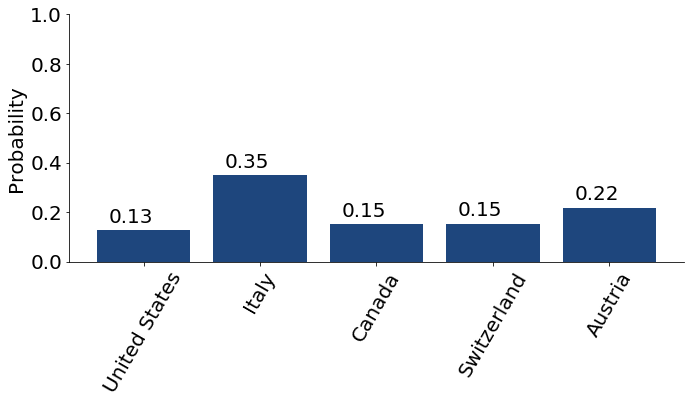

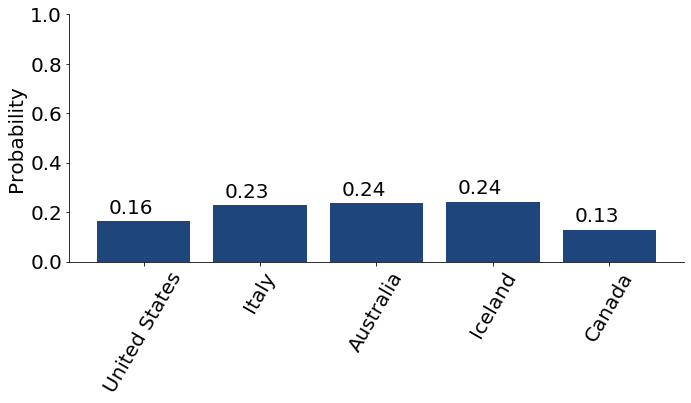

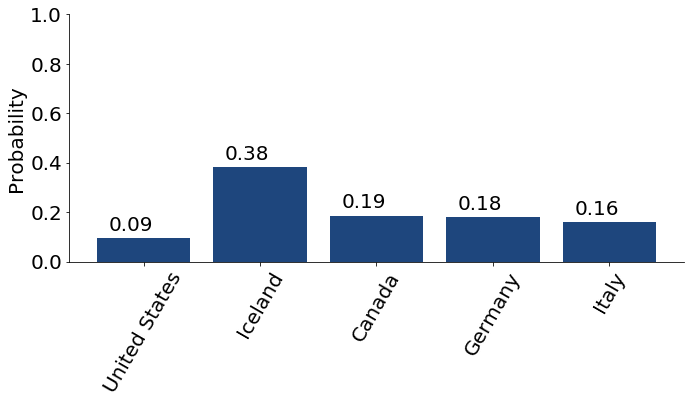

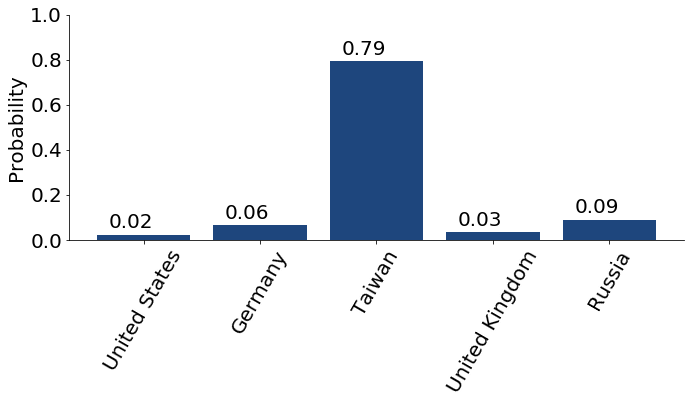

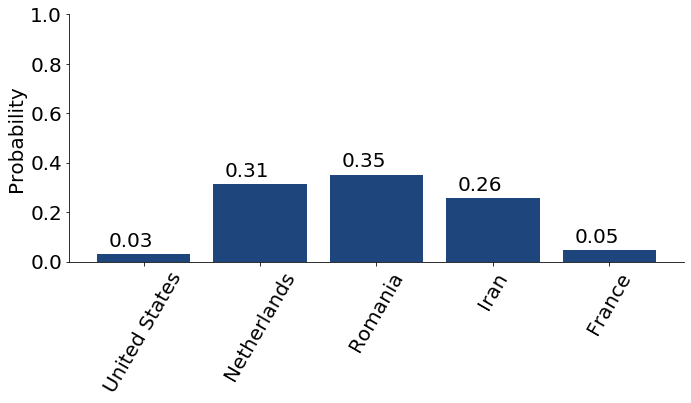

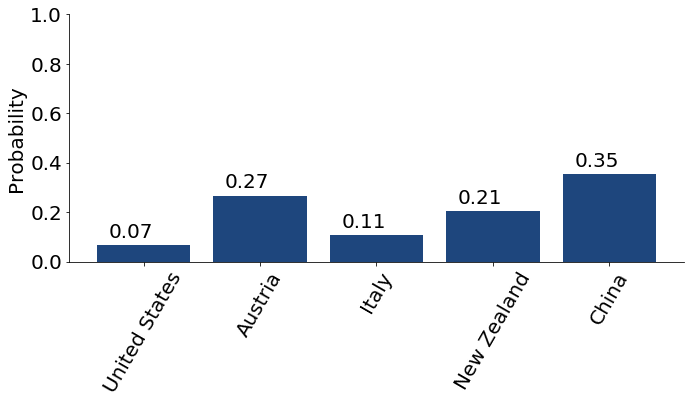

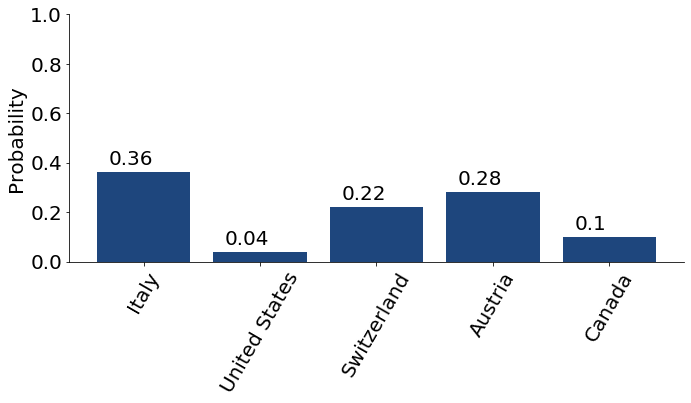

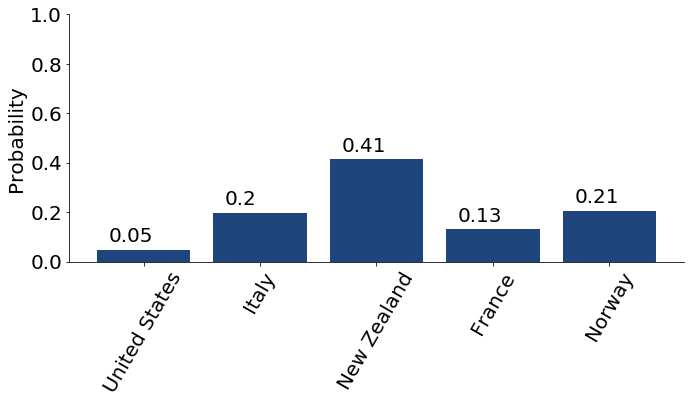

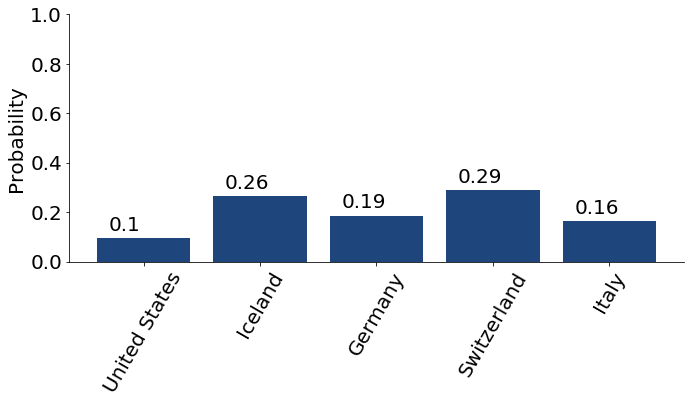

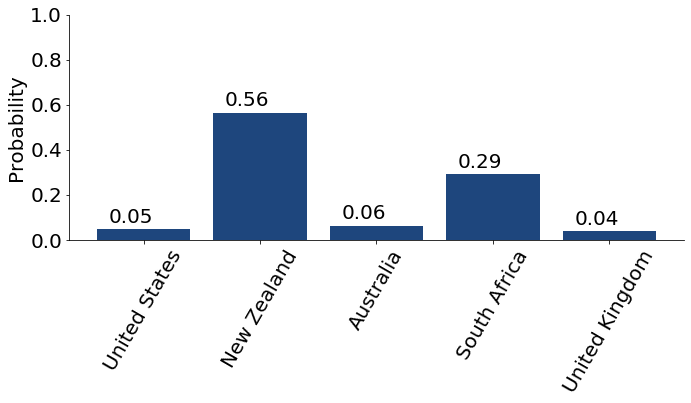

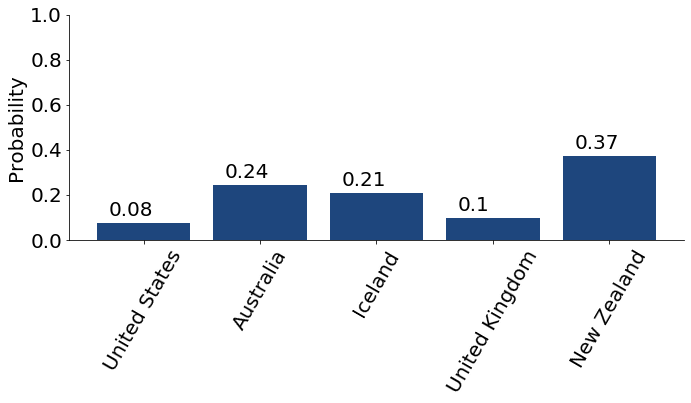

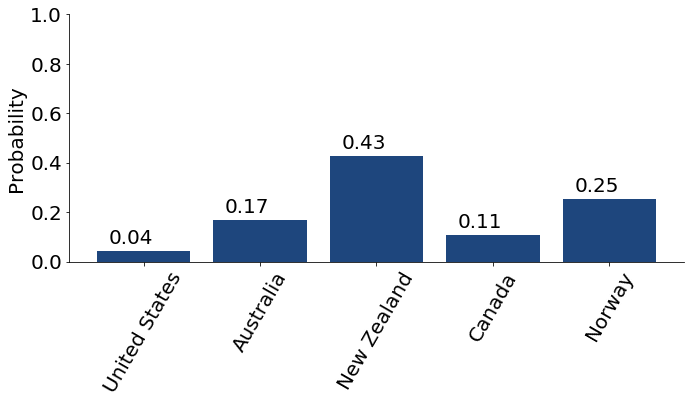

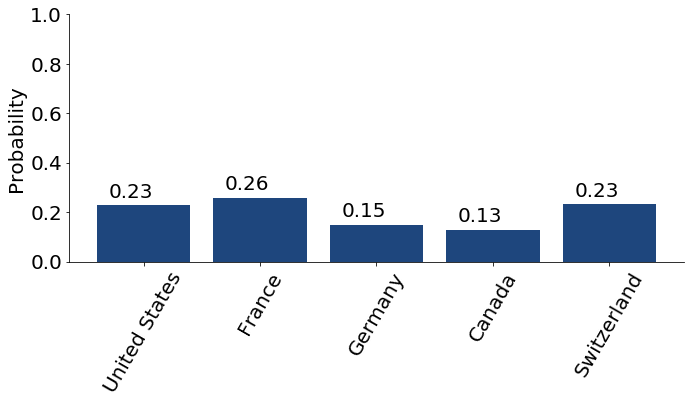

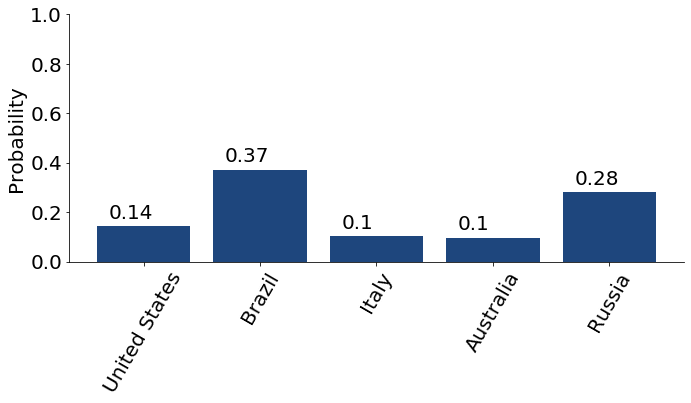

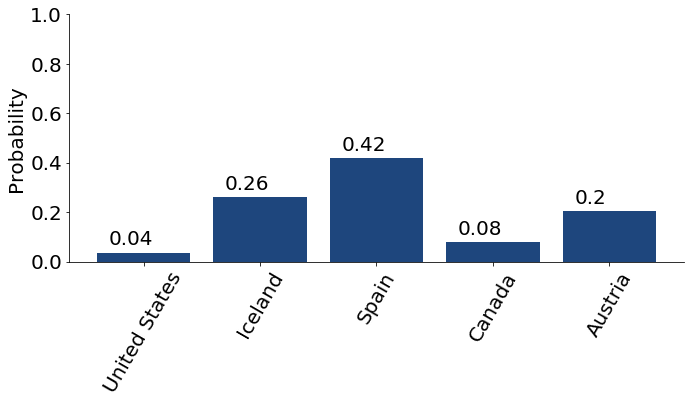

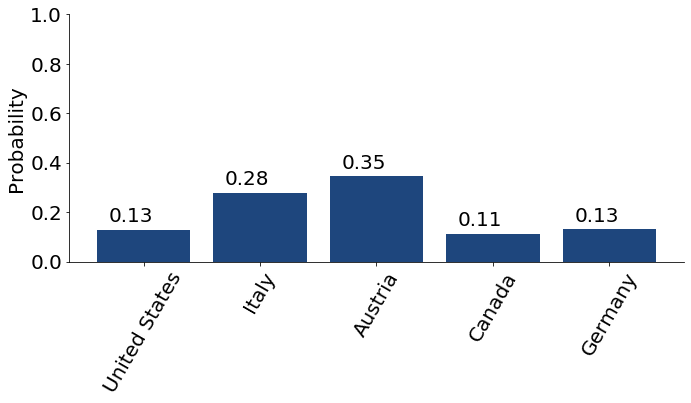

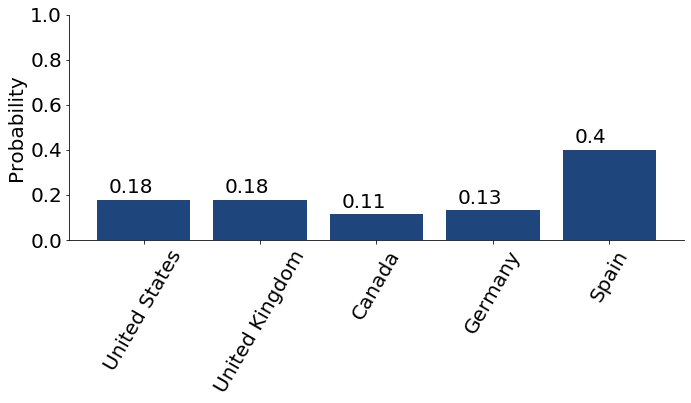

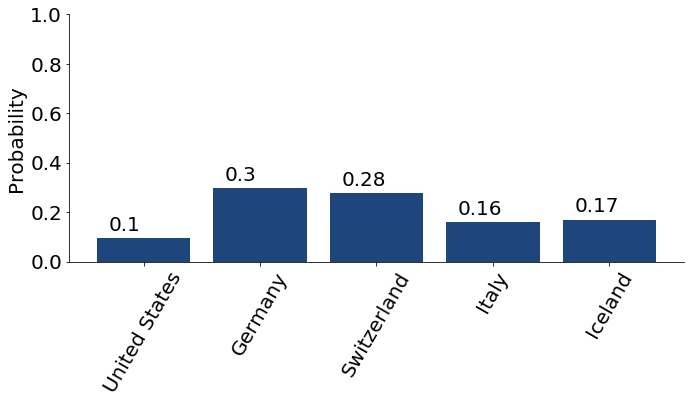

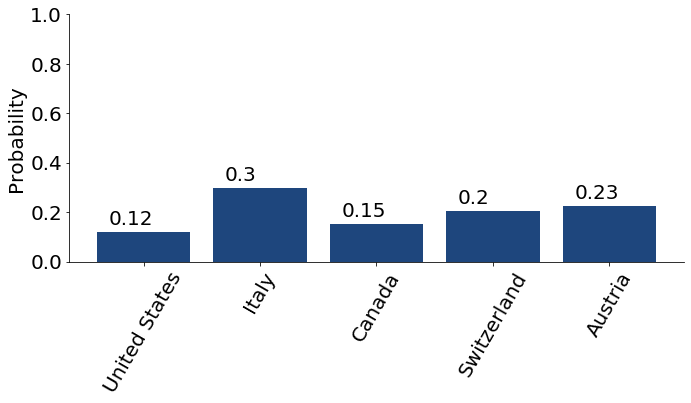

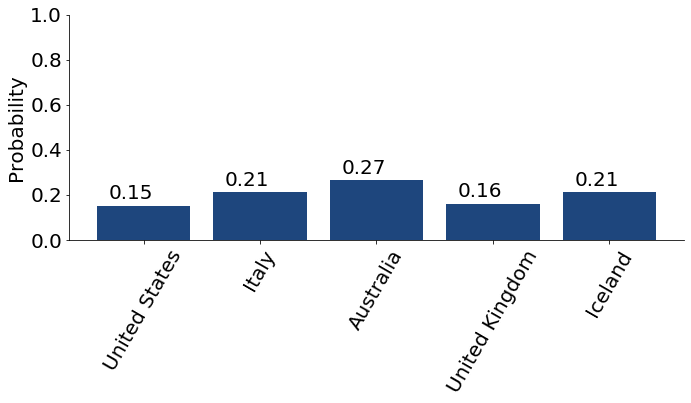

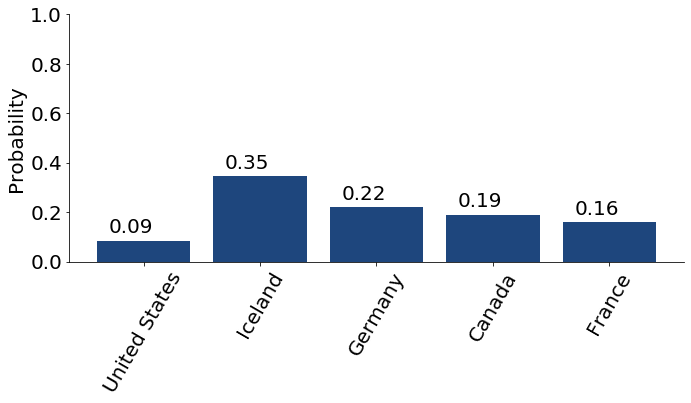

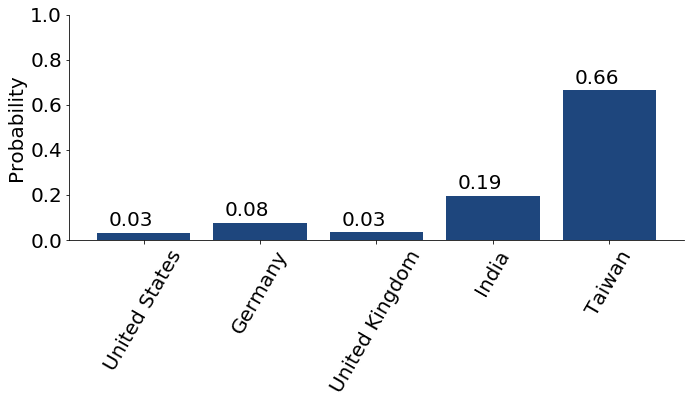

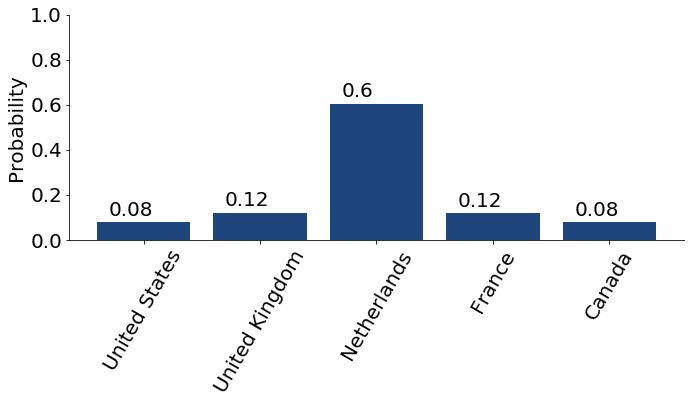

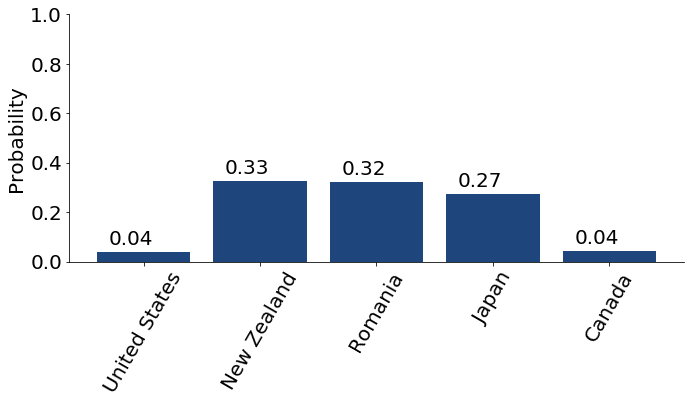

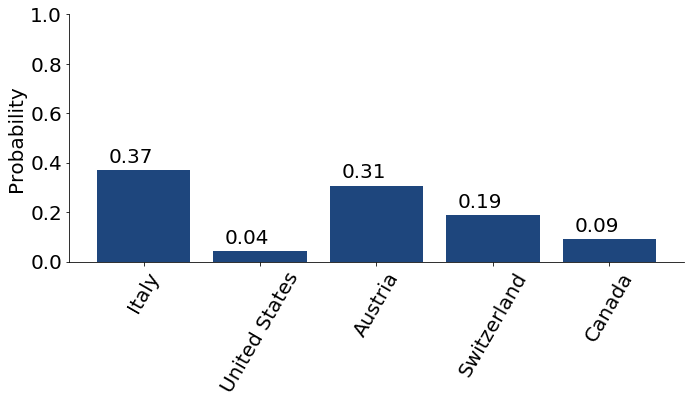

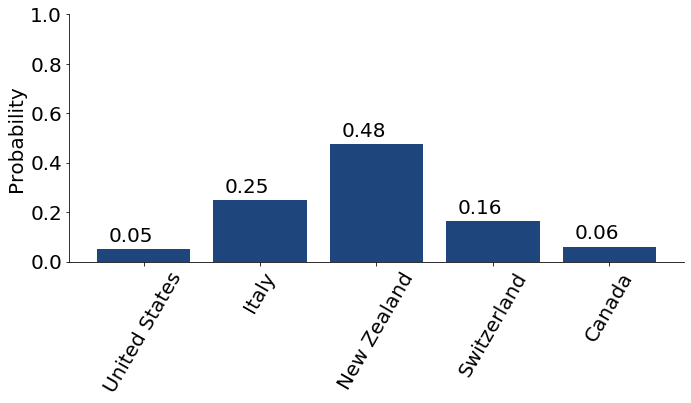

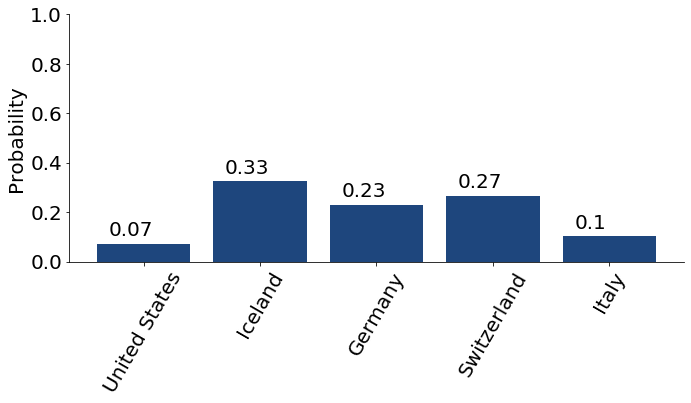

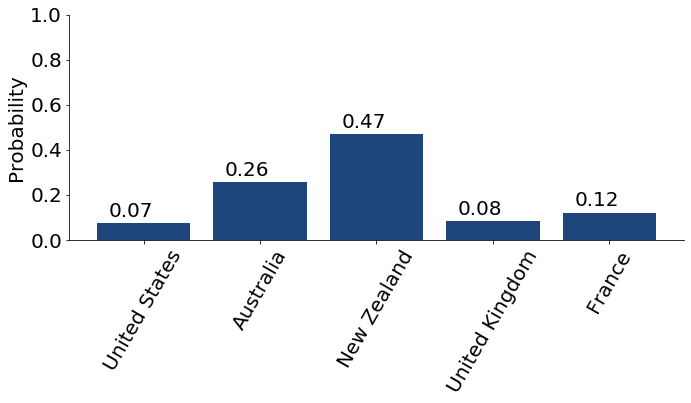

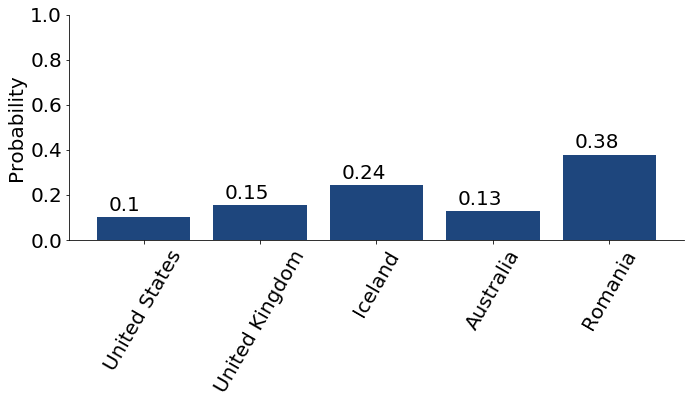

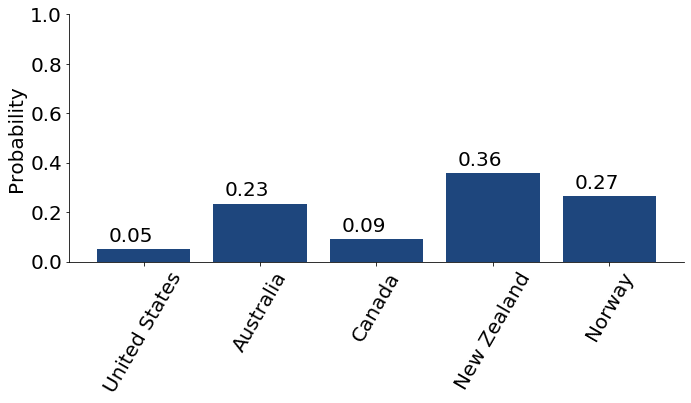

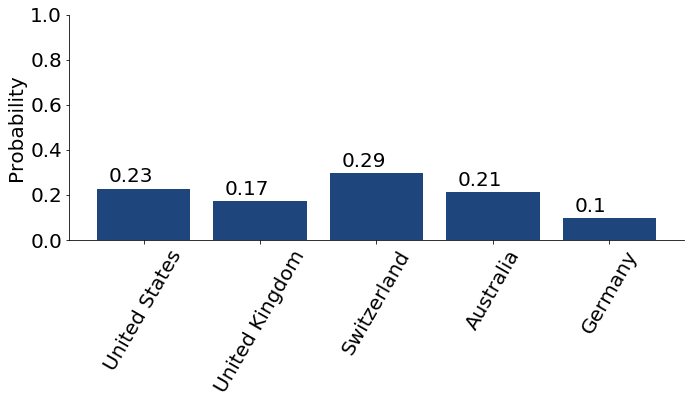

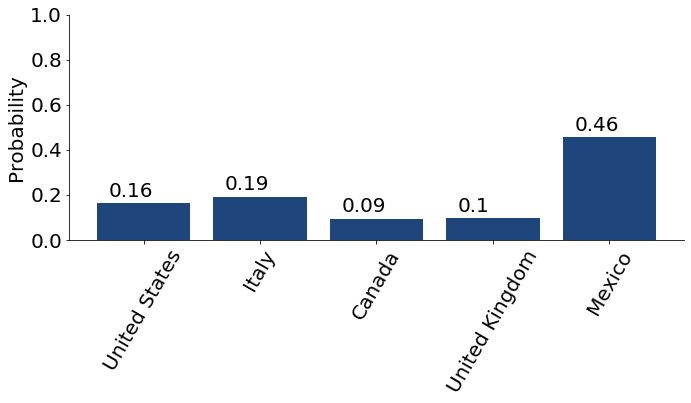

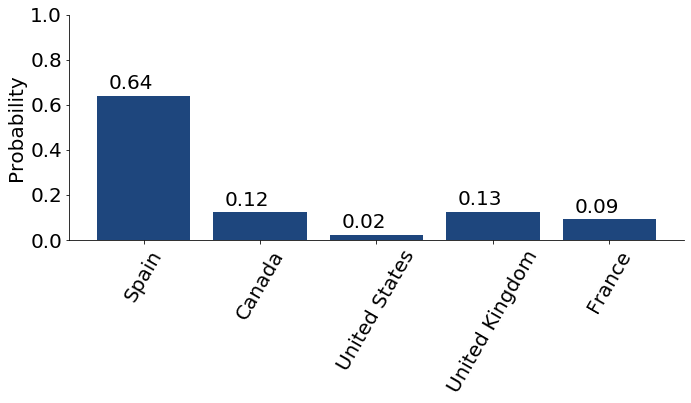

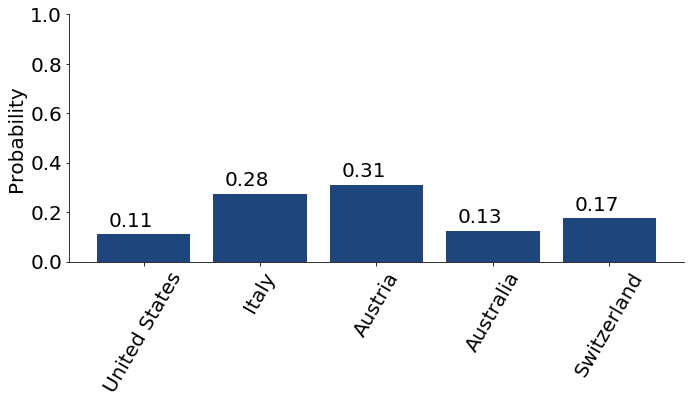

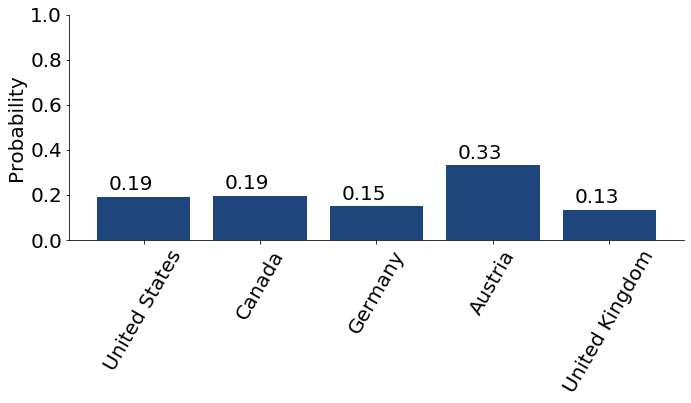

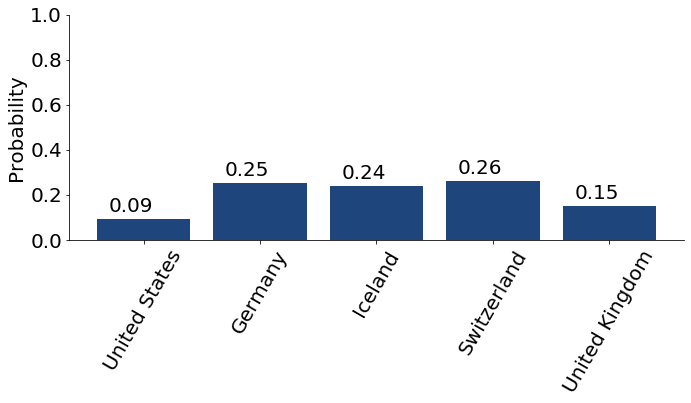

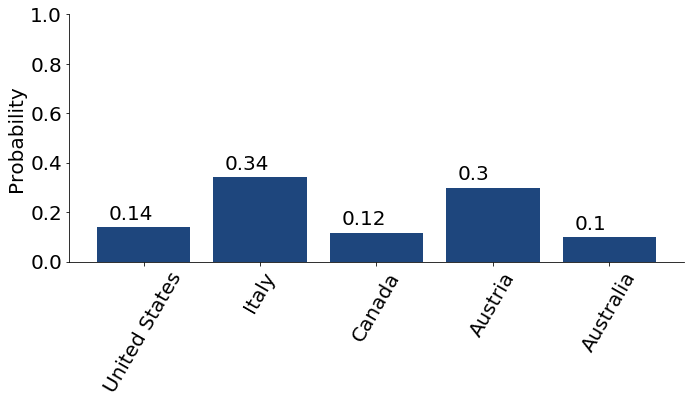

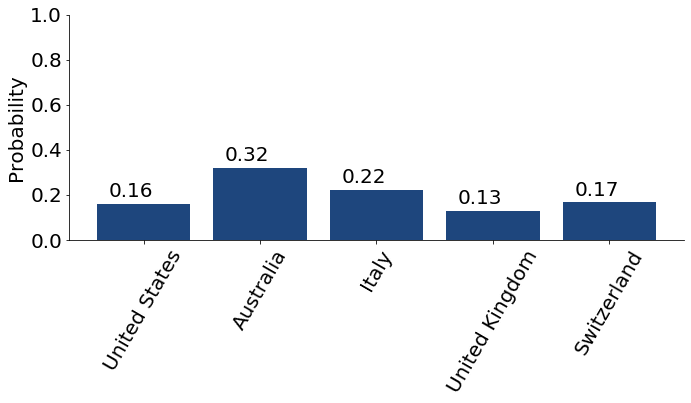

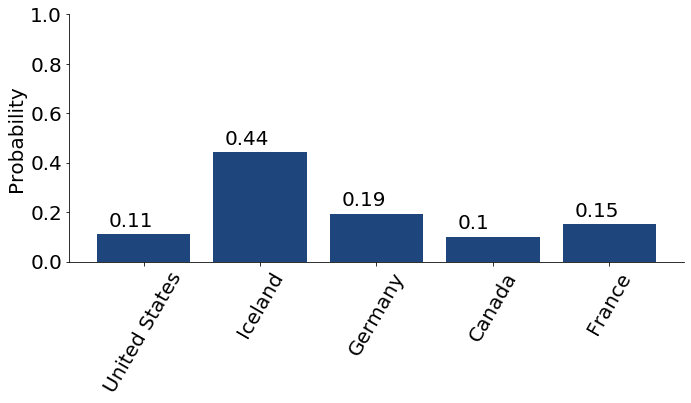

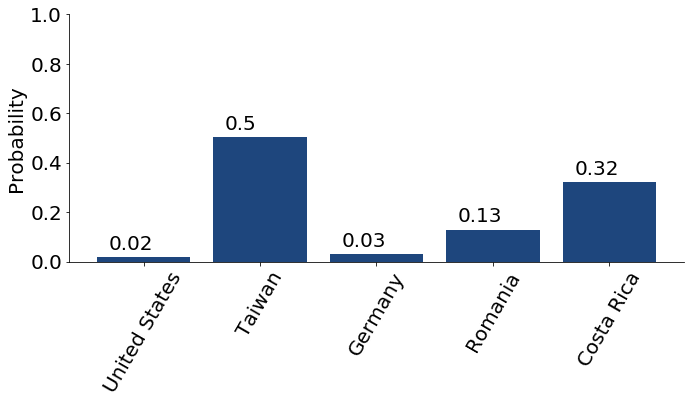

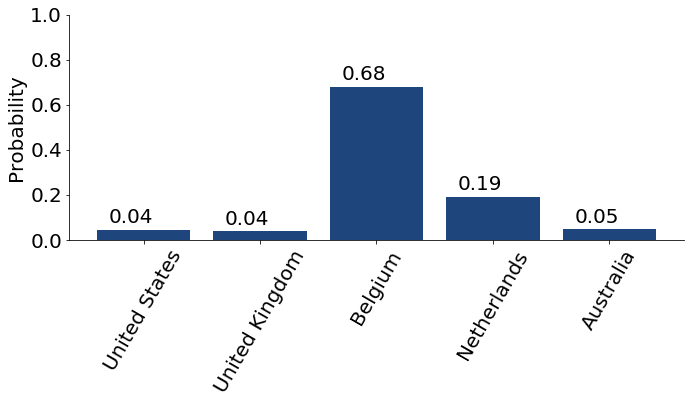

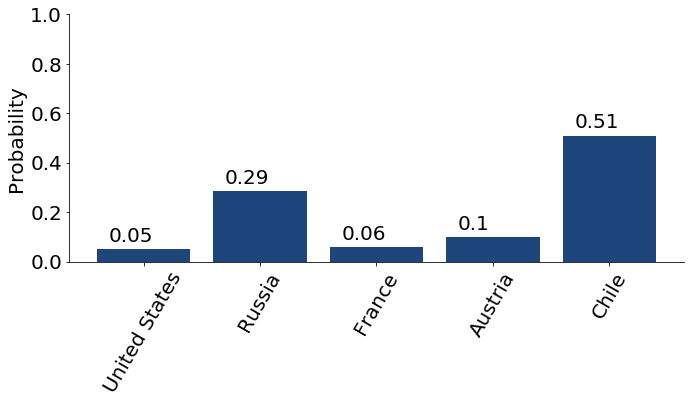

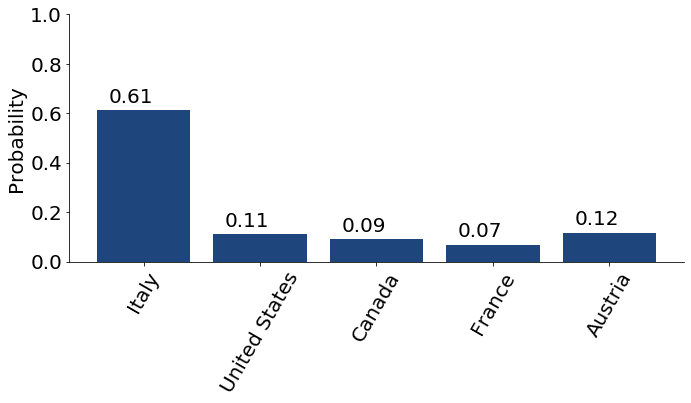

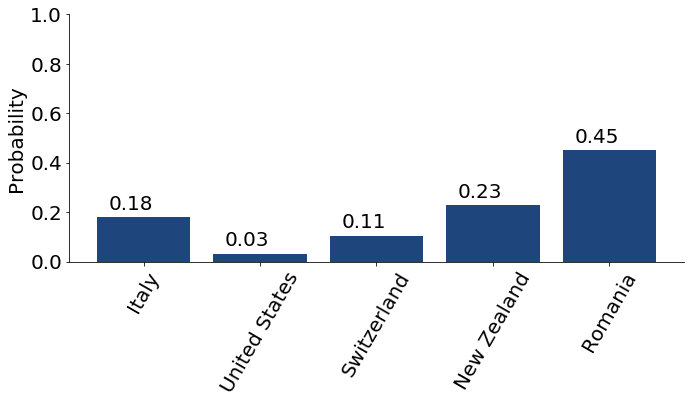

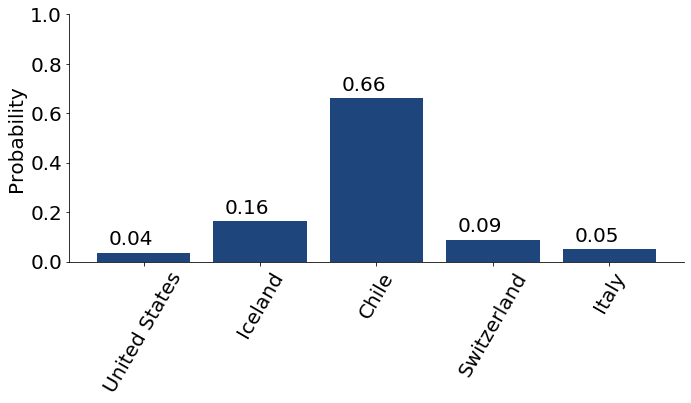

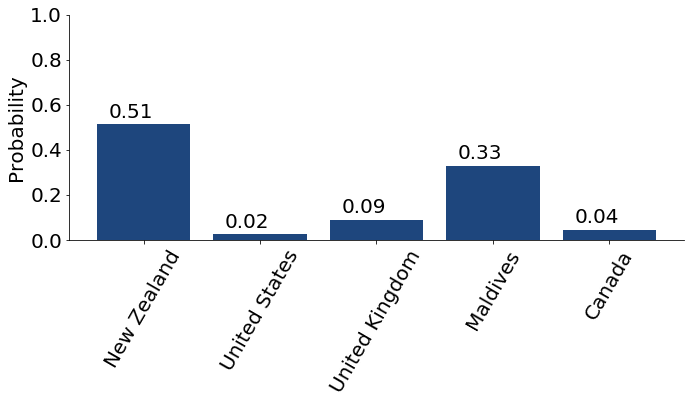

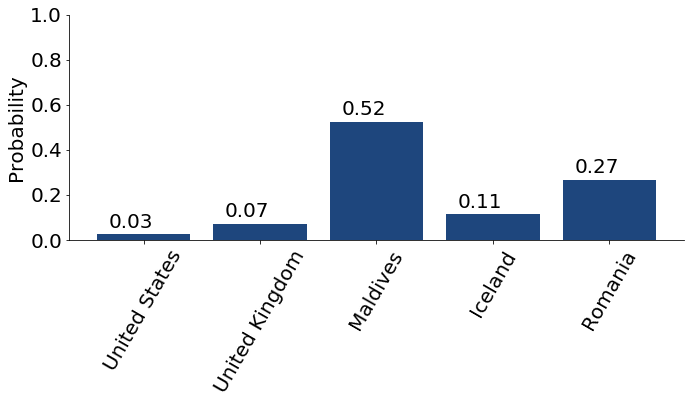

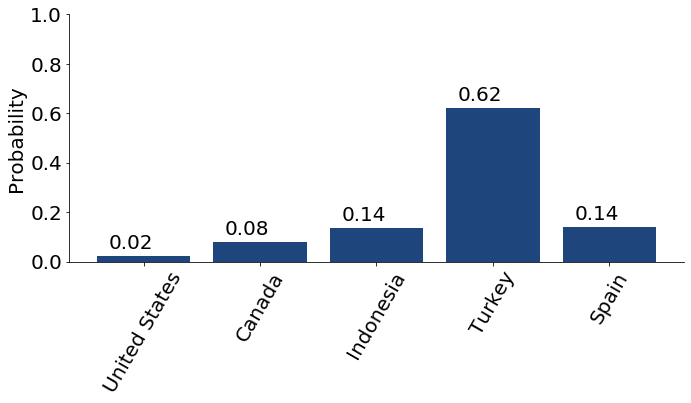

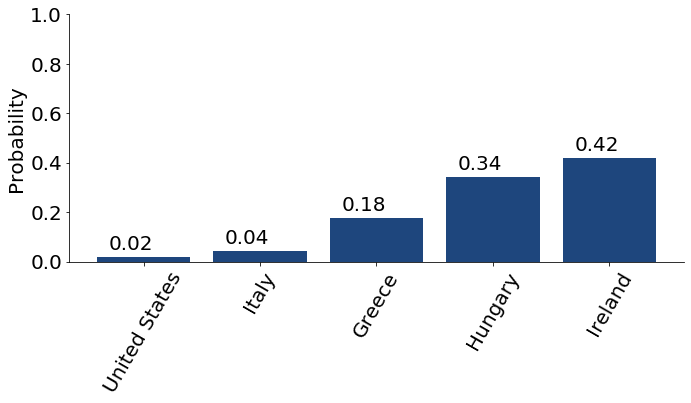

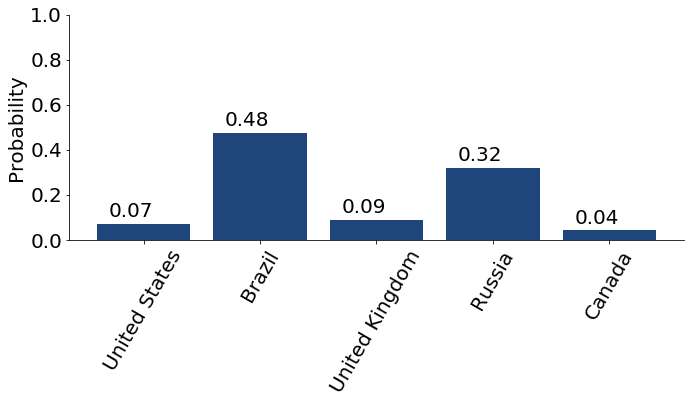

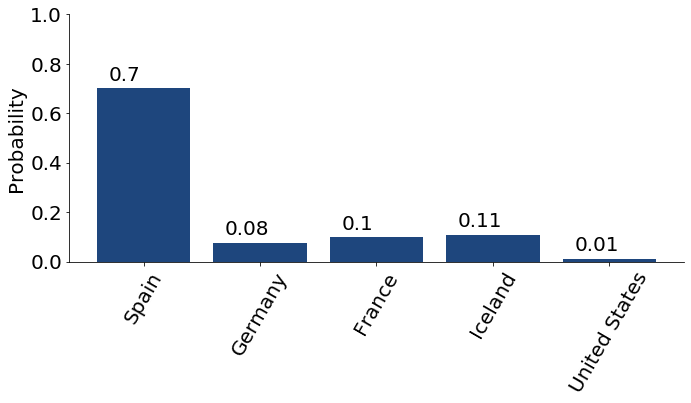

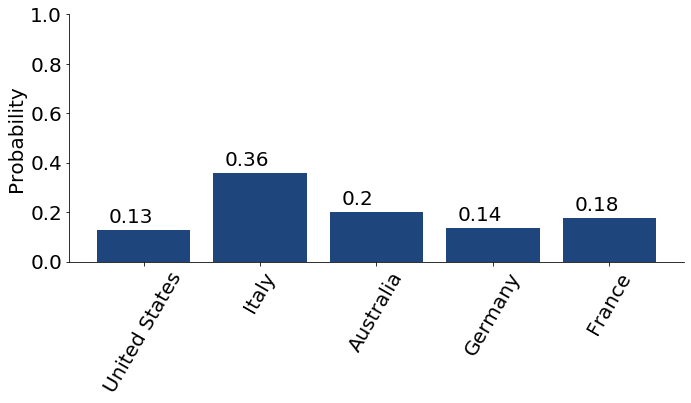

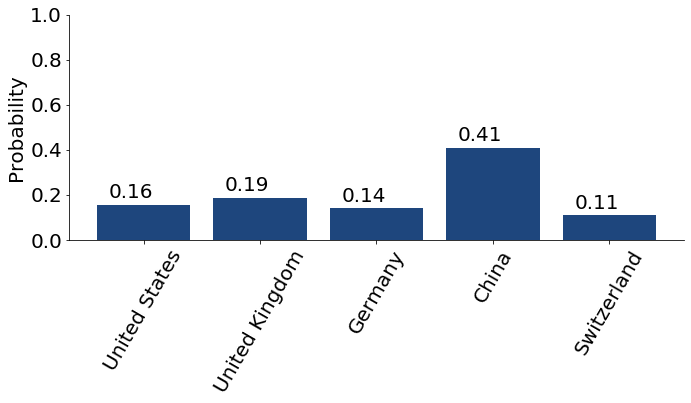

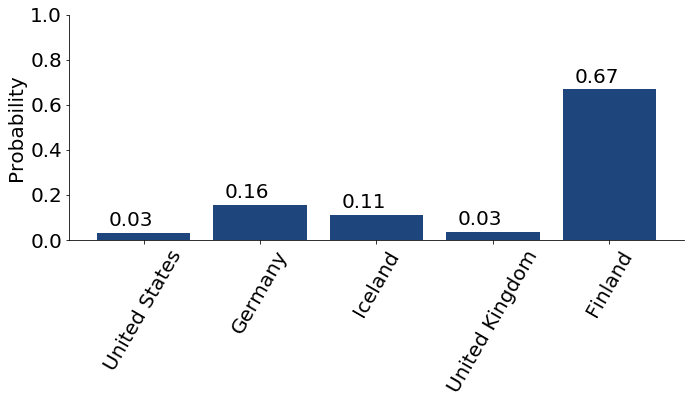

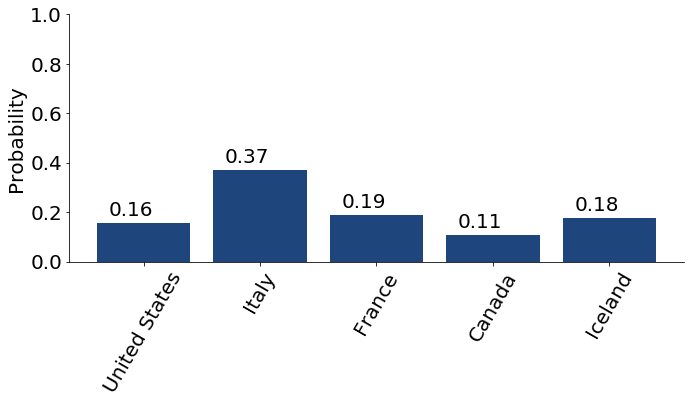

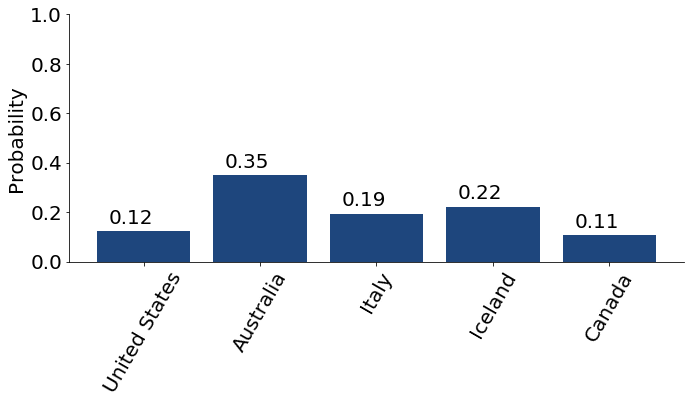

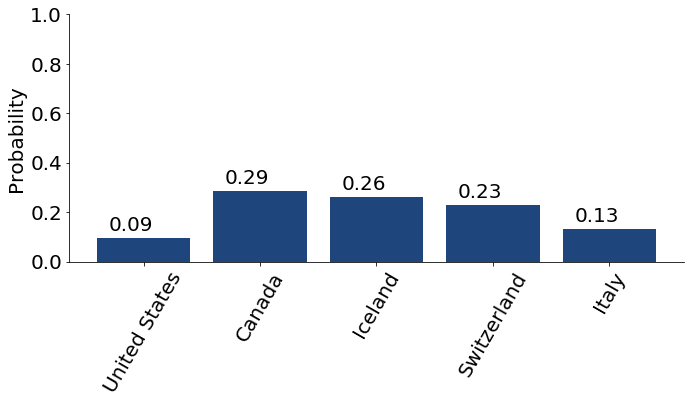

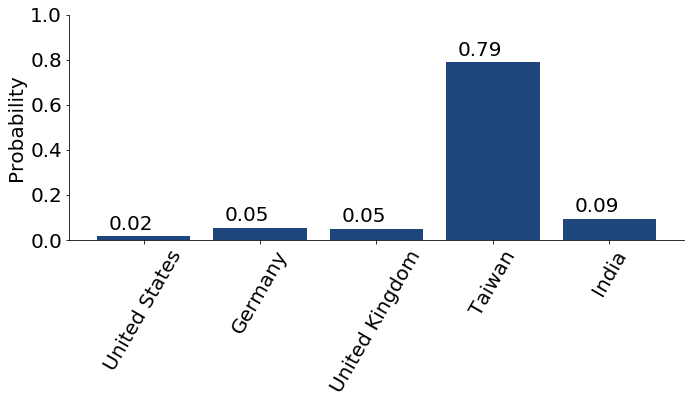

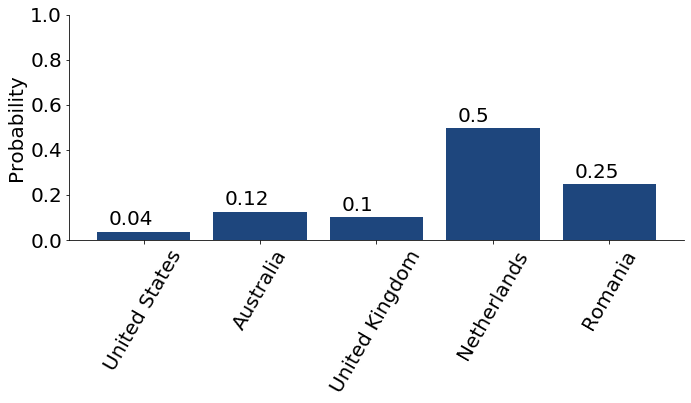

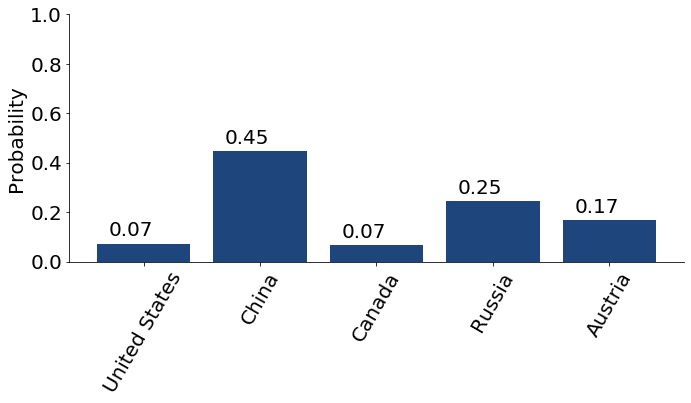

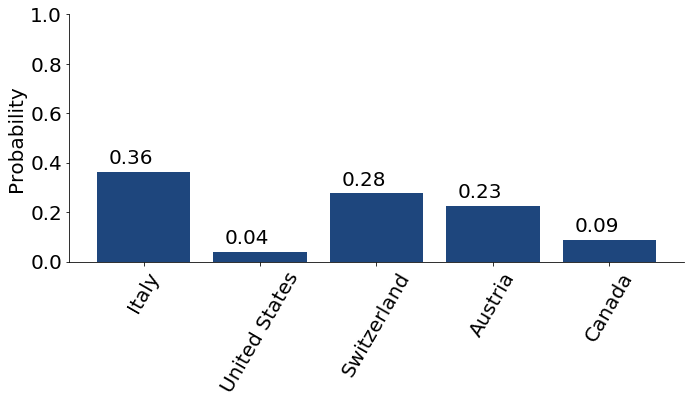

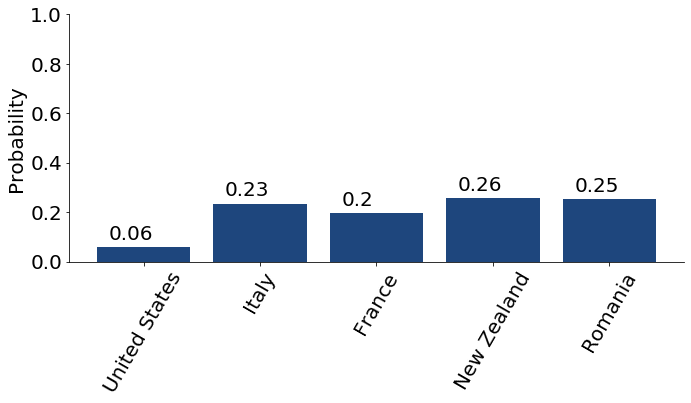

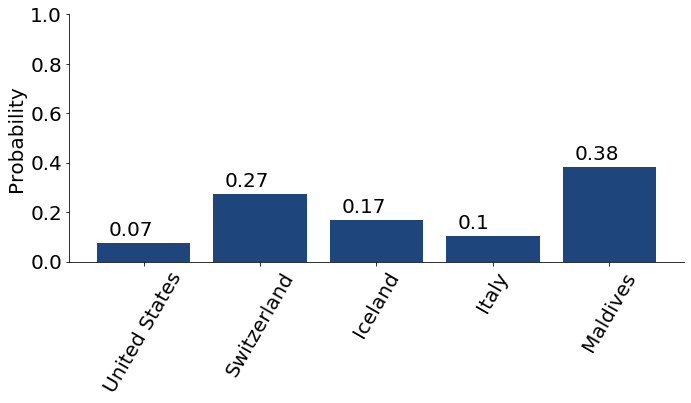

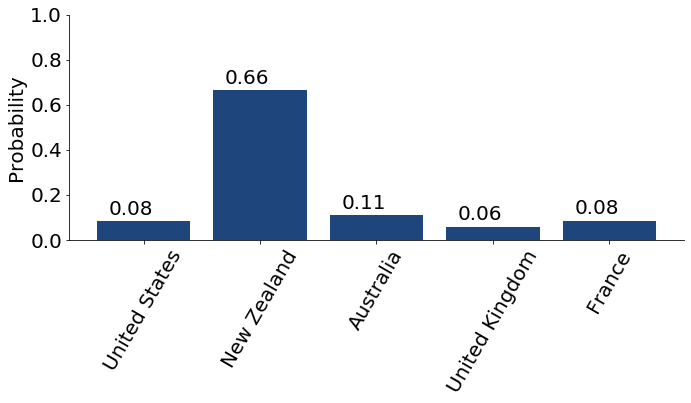

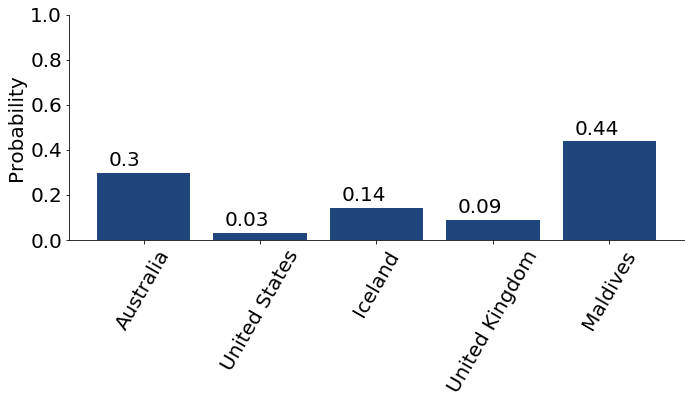

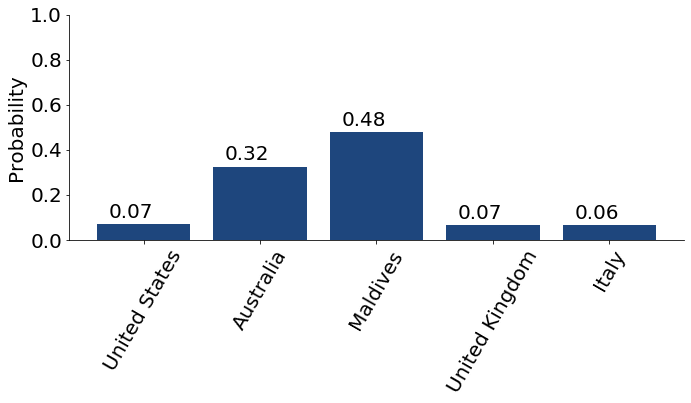

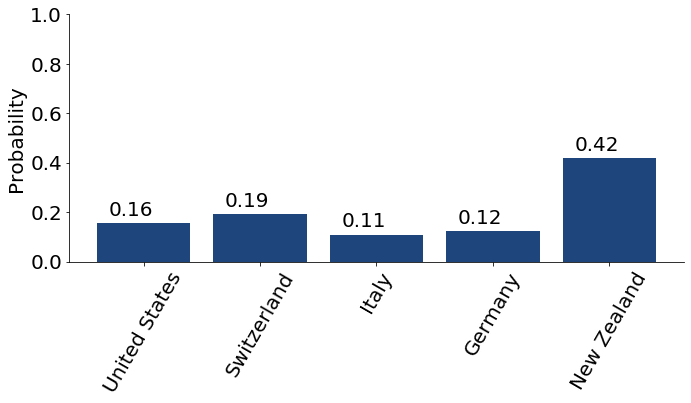

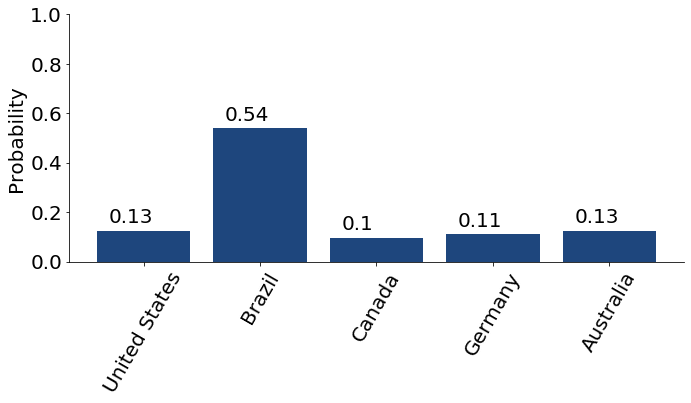

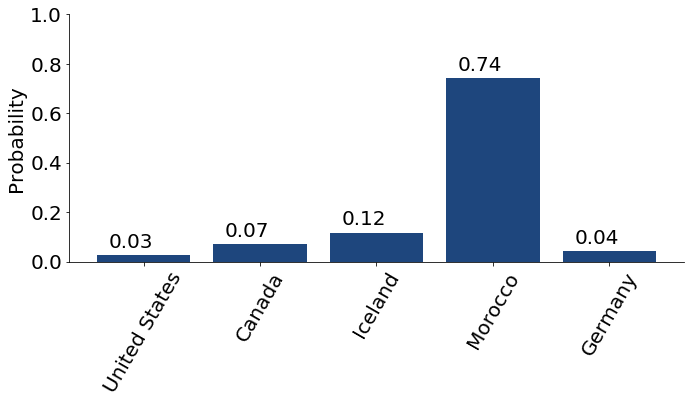

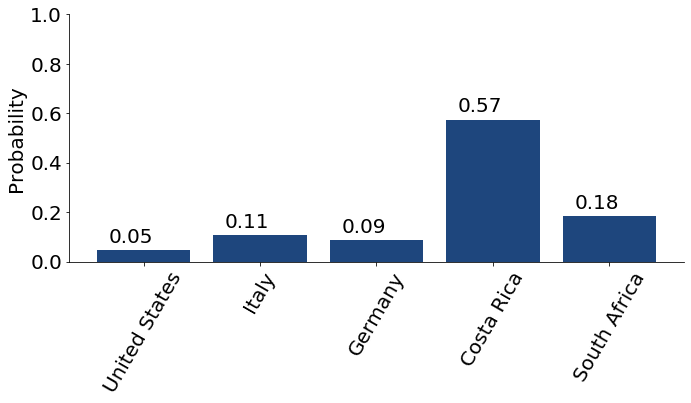

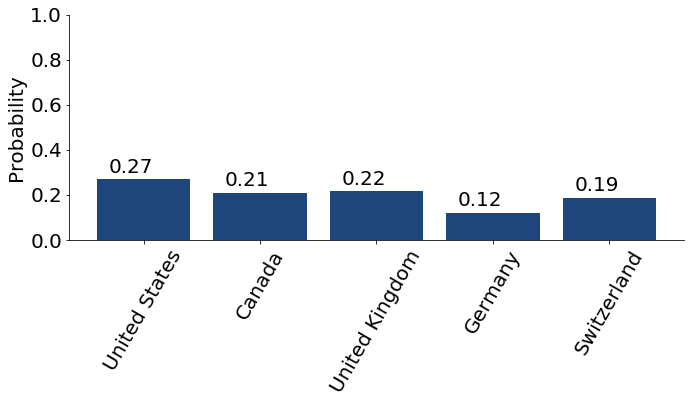

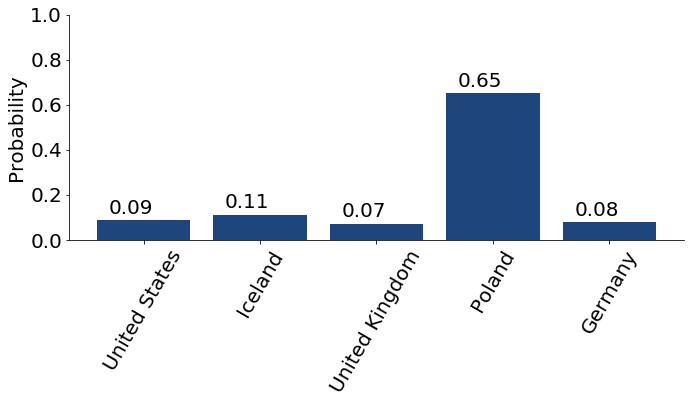

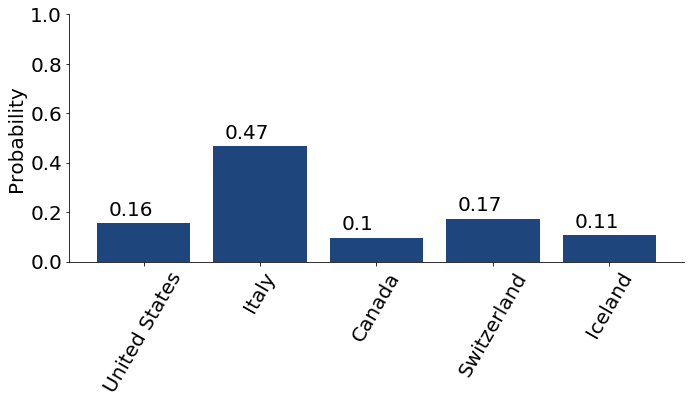

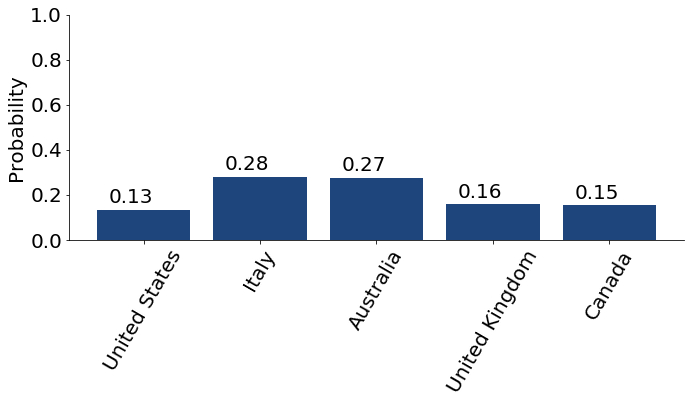

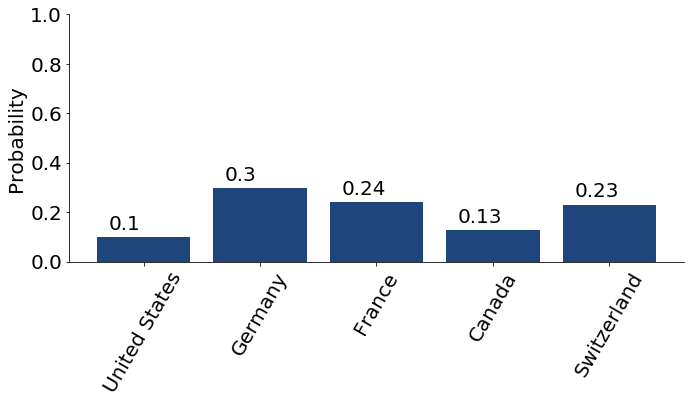

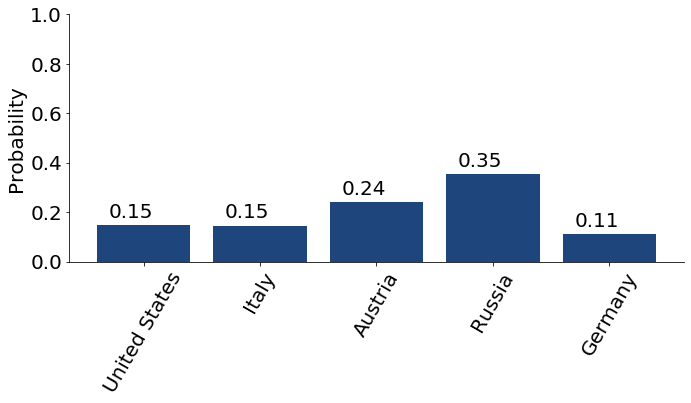

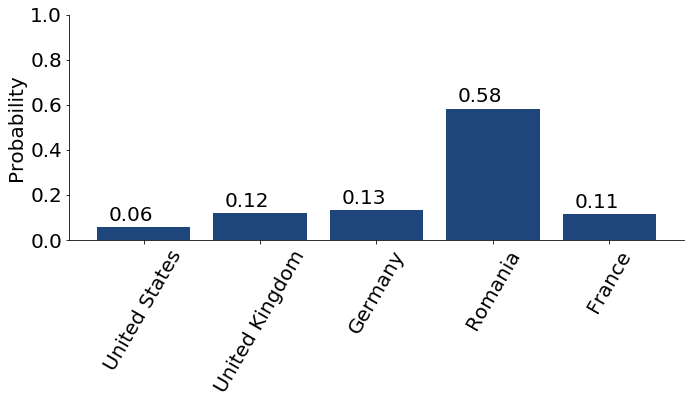

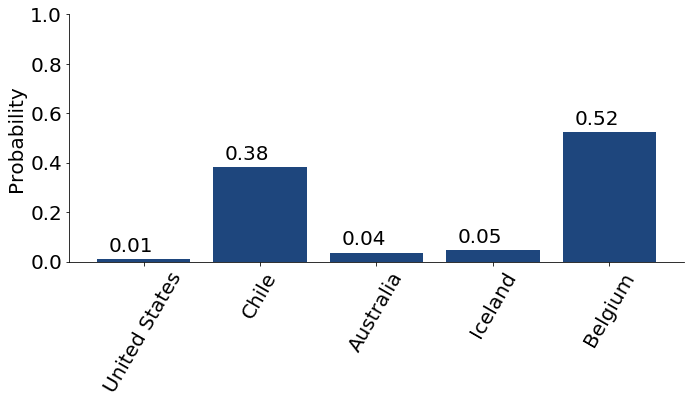

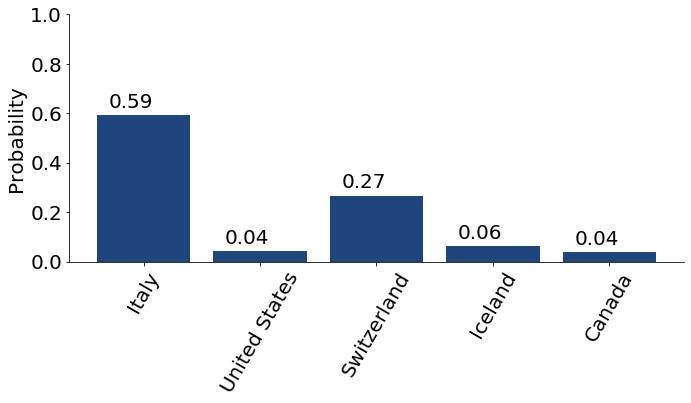

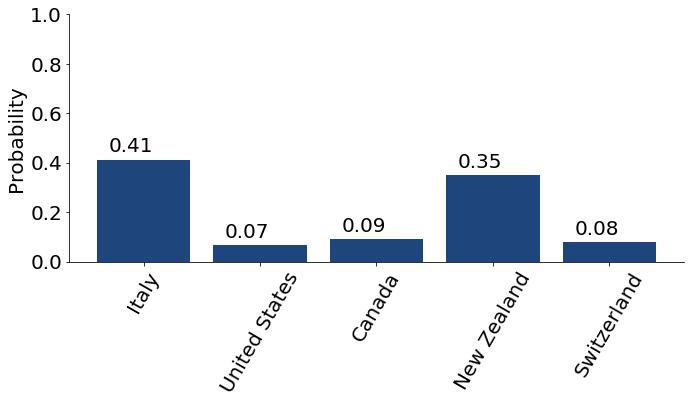

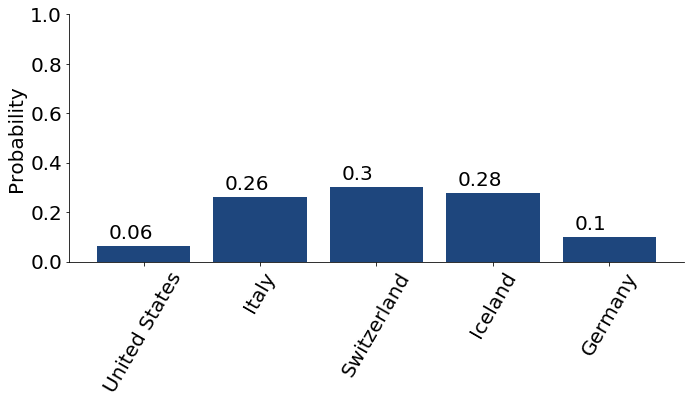

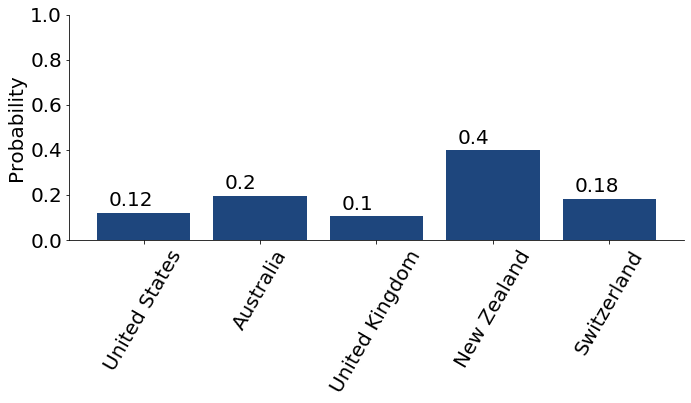

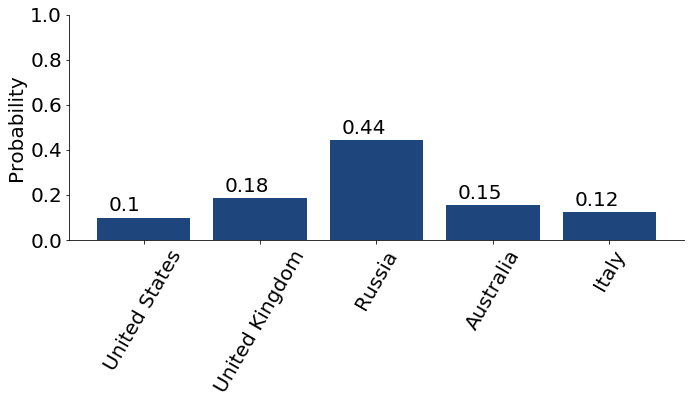

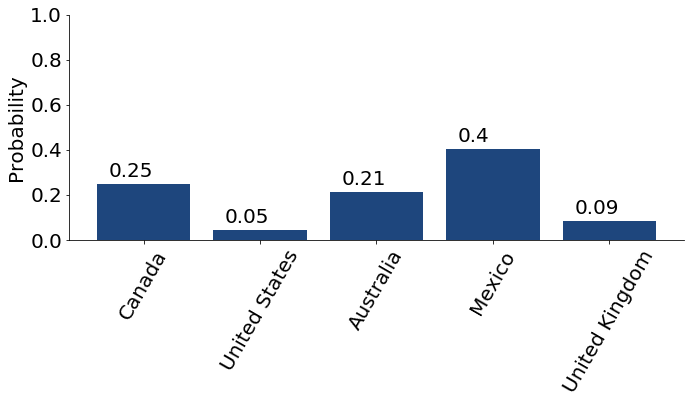

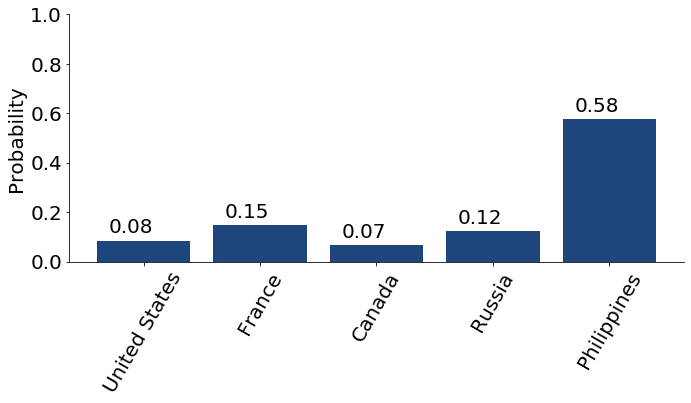

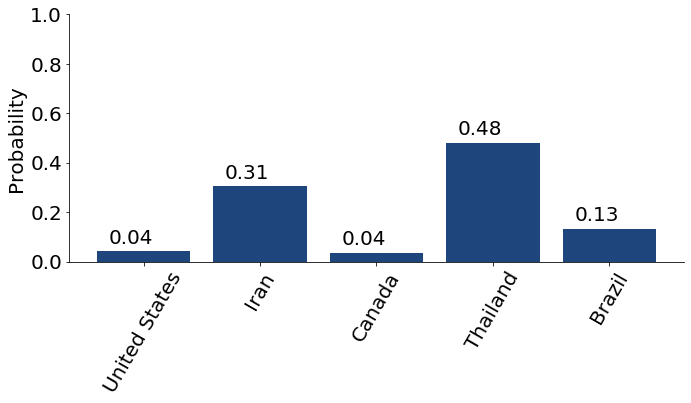

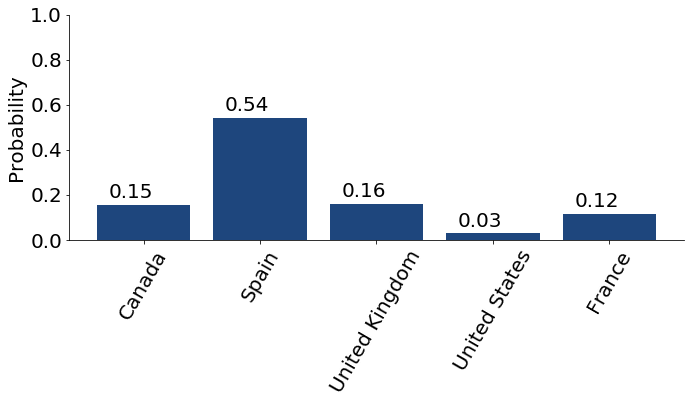

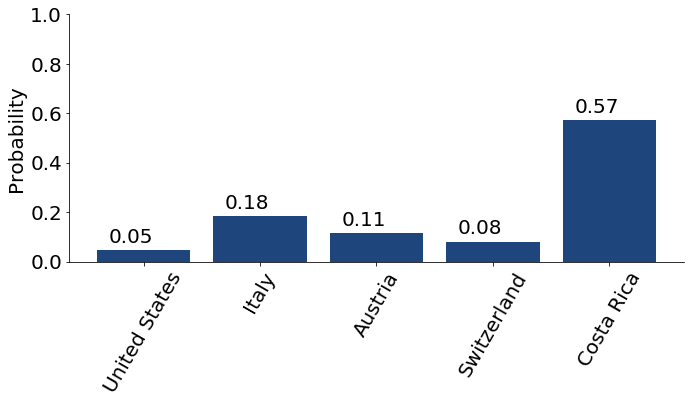

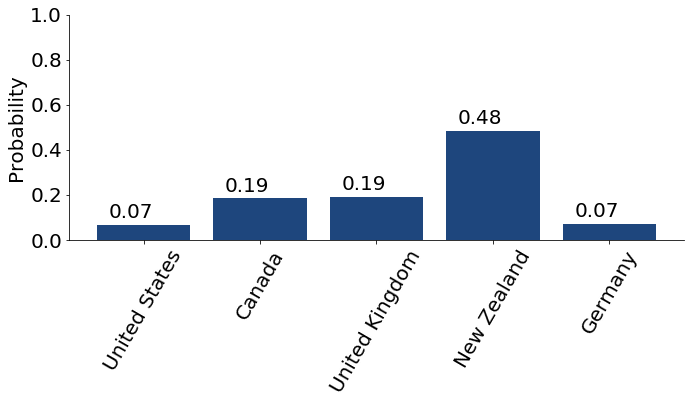

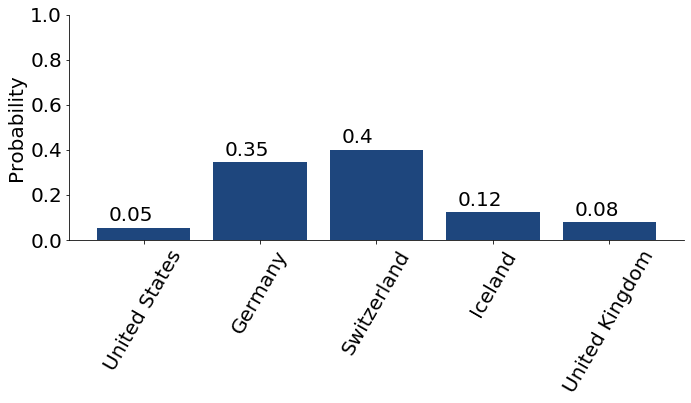

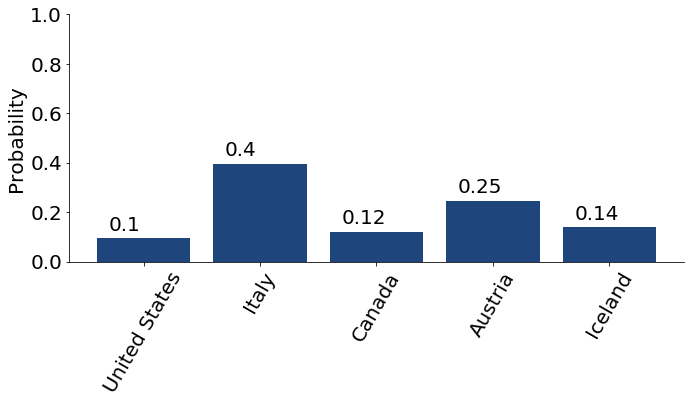

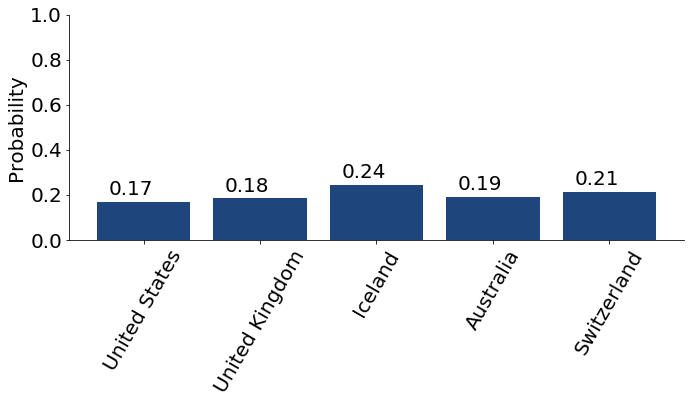

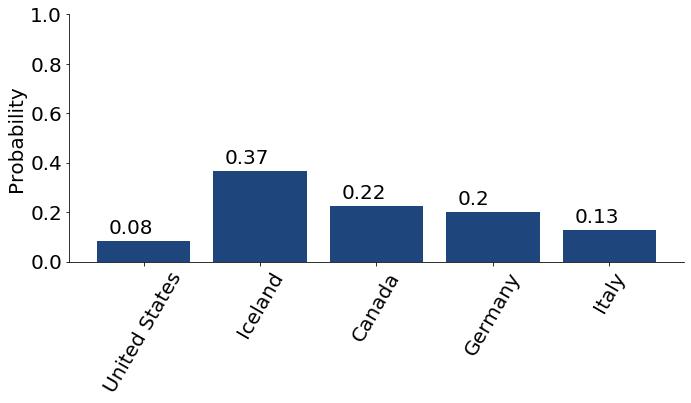

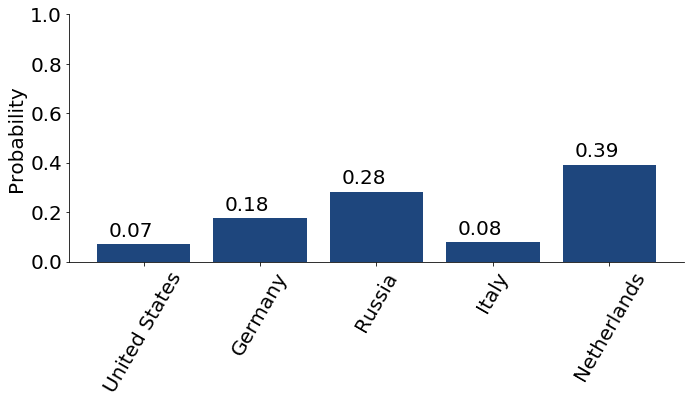

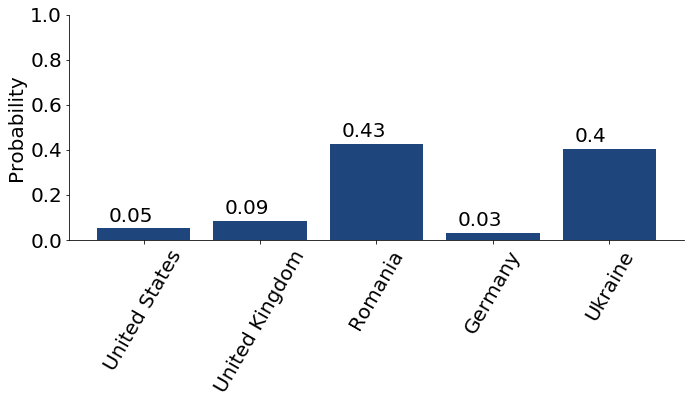

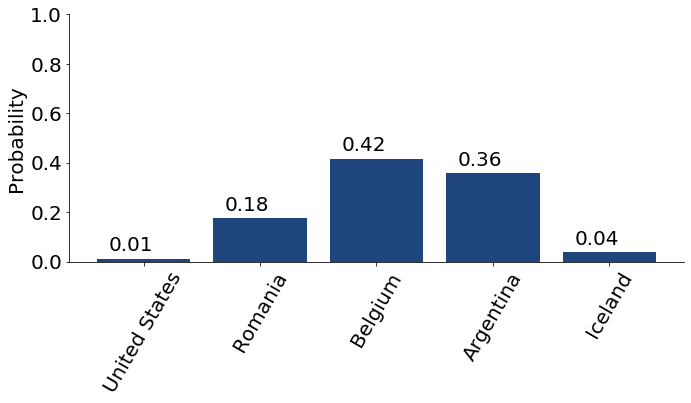

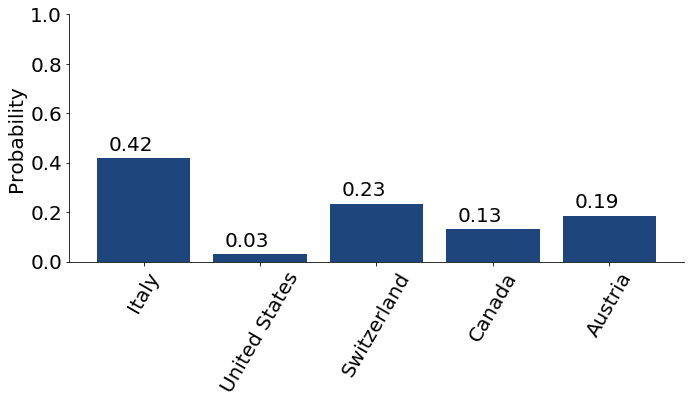

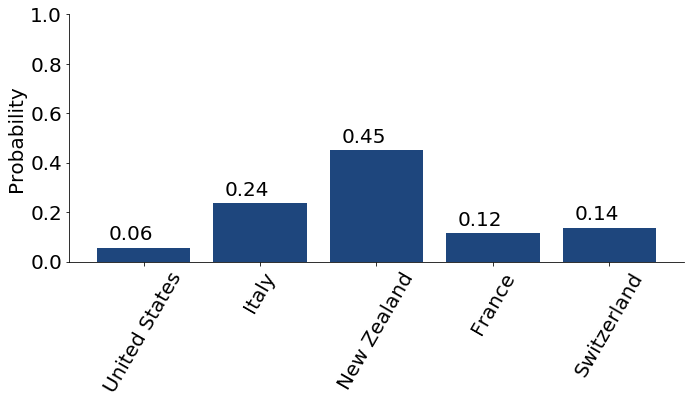

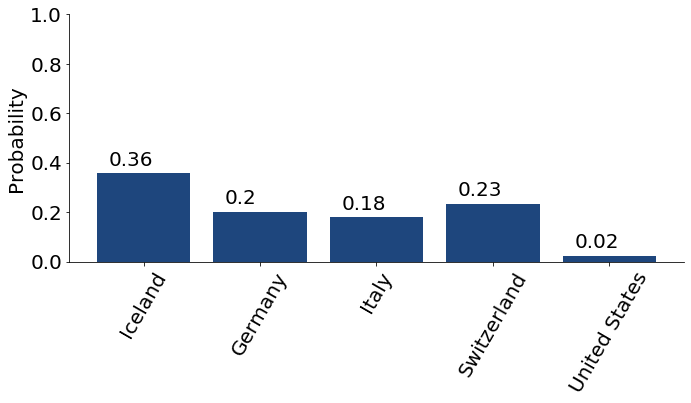

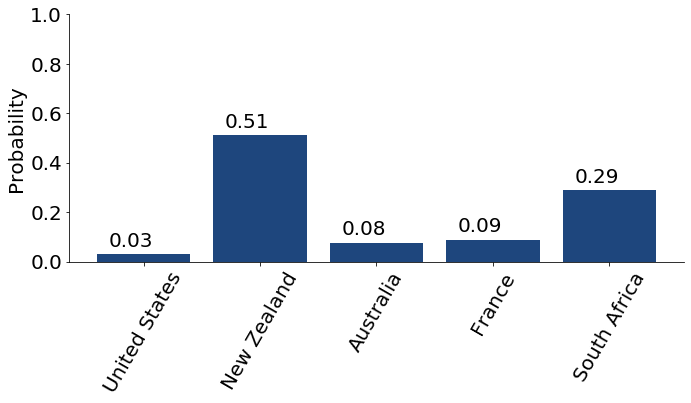

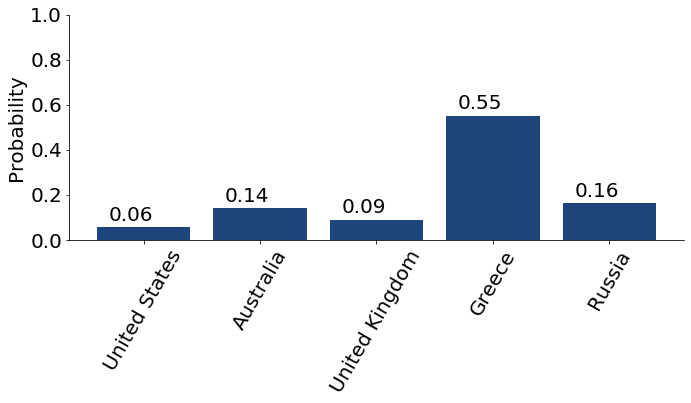

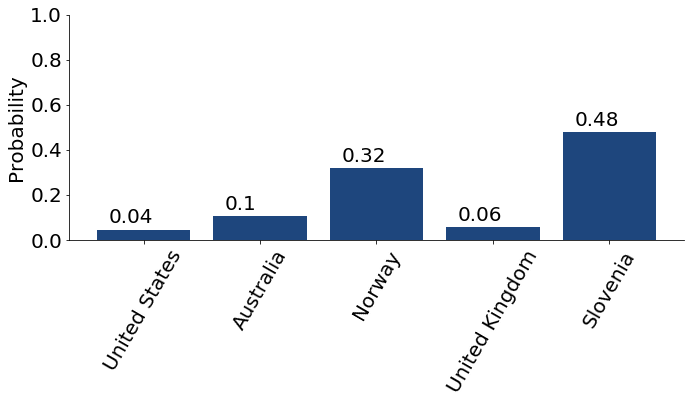

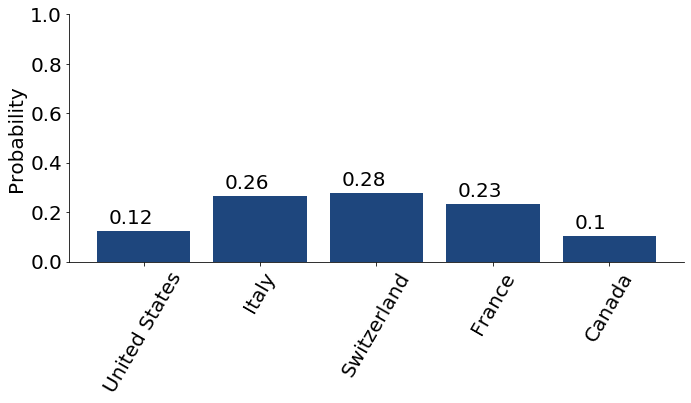

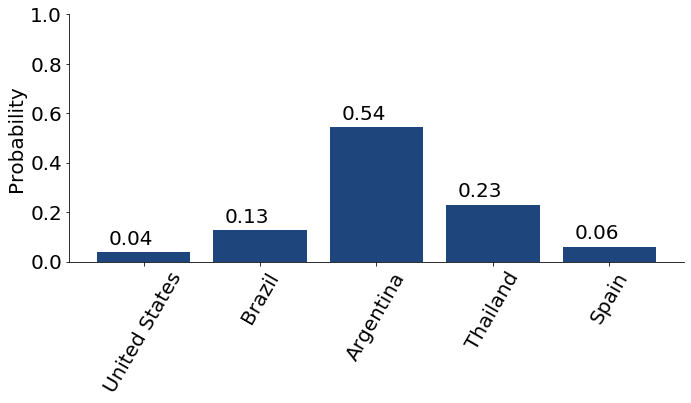

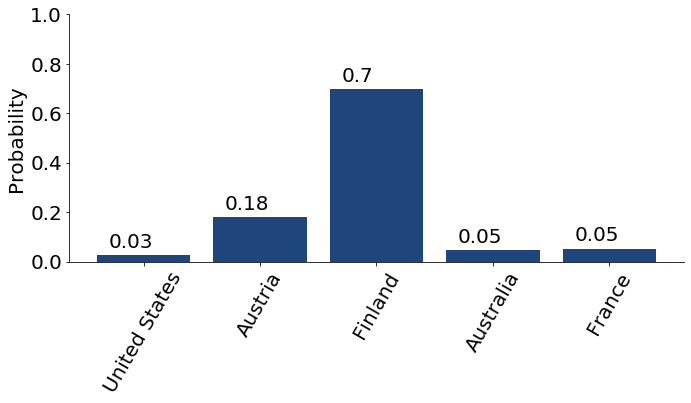

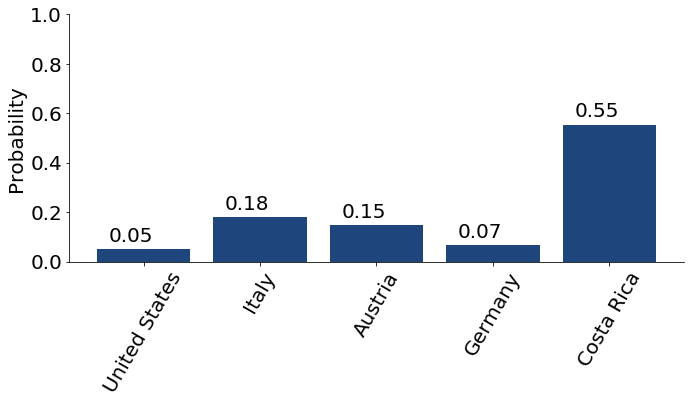

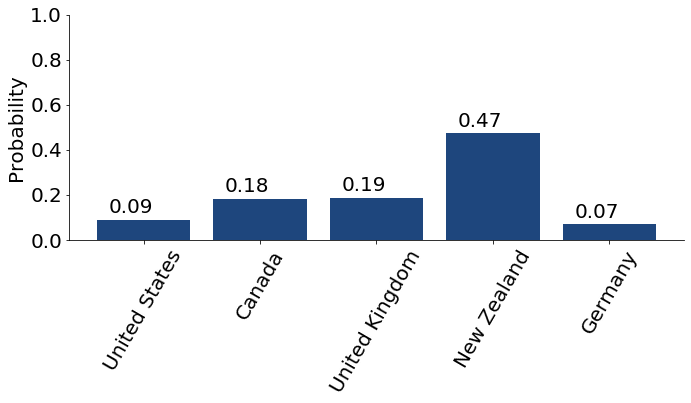

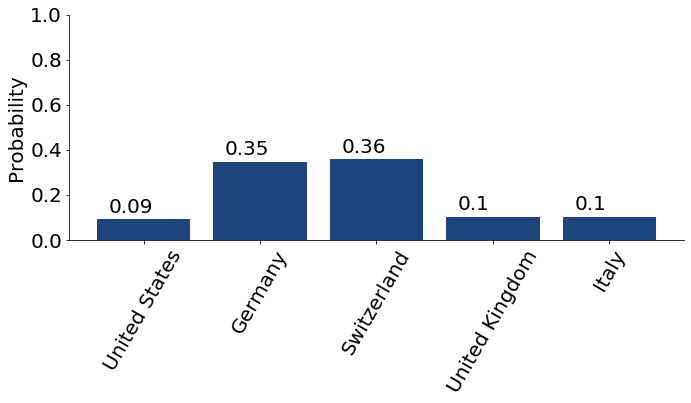

In [11]:
df= pd.read_csv('predictionModel.csv')

for i in range(len(df)):
    l = df['color'][i]
    j = df['keyword'][i]
    k = df['camera'][i]
    x = []
    y = []
    x.append(df['Nation1'][i])
    x.append(df['Nation2'][i])
    x.append(df['Nation3'][i])
    x.append(df['Nation4'][i])
    x.append(df['Nation5'][i])
    y.append(float(df['nation1ratio'][i]))
    y.append(float(df['nation2ratio'][i]))
    y.append(float(df['nation3ratio'][i]))
    y.append(float(df['nation4ratio'][i]))
    y.append(float(df['nation5ratio'][i]))
    
    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(figsize=(10,6))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.bar(x,y,color ="#1e467d")
    ax.set_ylim(top=1.0)
    ax.set_ylabel('Probability')
    for index, value in enumerate(y):
        plt.text(index-0.3, value+0.03, str(round(value,2)))
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.savefig("barplots/"+str(l)+"_"+str(j)+"_"+str(k)+'.png',dpi=1200)





In [2]:
df1 = pd.read_csv('recommandPhotoHighest.csv')
c_l = ['France','Italy','United States']
import os
arr = os.listdir()
for i in range(len(df1)):
    url = df1['photo_url'][i]
    
    l = str(df1['color'][i])
    j = str(df1['keyword'][i])
#     k = str(df1['exif_camera_make'][i])
    if str(df1['photo_location_country'][i]) in c_l:
        o = "_".join(str(df1['photo_location_country'][i]).split())
    else:
        continue

    r = requests.get(url)
    page = BeautifulSoup(r.text)
    imglist = page.find_all("img")
    srcset = imglist[2]['srcset']
    picurl = srcset.split()[0]
    check_output("curl '"+picurl+"' -o "+l+"_"+j+"_"+o+".jpeg", shell=True)